# 1. Análise exploratória de dados

-----

A ideia aqui é basicamente estudar a estrutura do dataset e tirar algumas metricas basicas do dataset, como media mediana entre outras, e como elas se comportam no geral.

## 1.1 Carregar os dados: 

--------------

In [4]:
pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
file_path = "Gym_Progress_Dataset.csv"  #importa csv direto do kaggle 

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "rishabhagarwal997889/gym-progress-tracking-dataset-200-days",
    file_path,
)

df.head()#carrega os 5 primeiros

C:\Users\Admin\AppData\Local\Temp\ipykernel_11956\3762017452.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 6.56k/6.56k [00:00<00:00, 2.23MB/s]


,Day,Weight_kg,Calories_Intake,Protein_Intake_g,Workout_Duration_min,Steps_Walked
0,2025-01-01,71.5,3209,70,41,6820
1,2025-01-02,69.6,2584,150,40,4898
2,2025-01-03,71.9,2927,148,89,9546
3,2025-01-04,74.6,3216,85,20,2077
4,2025-01-05,69.3,2045,145,24,9577


In [ ]:
df.columns#colunas

Index(['Day', 'Weight_kg', 'Calories_Intake', 'Protein_Intake_g',
       'Workout_Duration_min', 'Steps_Walked'],
      dtype='object')

-  Temos aqui a primeira análise do edatset, temos algumas features, como o dia do ano (200 dias) que foi feita a nalise, o peso da pessoa, ingestão de calorias no dia, quantidade de consumo de proteína, duração do treino feito no dia, e passos andados.

# 1.2. Estatísticas descritivas 

------------

In [11]:
df.describe() #principais estatisticas basicas.

,Weight_kg,Calories_Intake,Protein_Intake_g,Workout_Duration_min,Steps_Walked
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,69.878000,2703.915000,115.000000,66.555000,8352.705000
std,2.795656,466.300114,37.673952,29.866486,3701.129242
min,62.100000,1804.000000,50.000000,20.000000,2077.000000
25%,67.900000,2333.750000,82.750000,40.750000,5215.250000
50%,70.000000,2699.000000,114.500000,66.000000,8004.000000
75%,71.500000,3049.500000,148.000000,92.000000,11994.500000
max,78.200000,3498.000000,178.000000,119.000000,14999.000000


In [12]:
print(df.info()) # informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Day                   200 non-null    object 
 1   Weight_kg             200 non-null    float64
 2   Calories_Intake       200 non-null    int64  
 3   Protein_Intake_g      200 non-null    int64  
 4   Workout_Duration_min  200 non-null    int64  
 5   Steps_Walked          200 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB
None


- vemos que a maioria dass feature s se comportamentam como numeros (float e int)

In [13]:
print(df.isnull().sum()) #verifica a quantidade de valores nulos no dataset

Day                     0
Weight_kg               0
Calories_Intake         0
Protein_Intake_g        0
Workout_Duration_min    0
Steps_Walked            0
dtype: int64


- Sem dados nulos, o que adianta ainda mais a análise

## 1.3. Visualização de distribuição

-----------------

- histograma individual

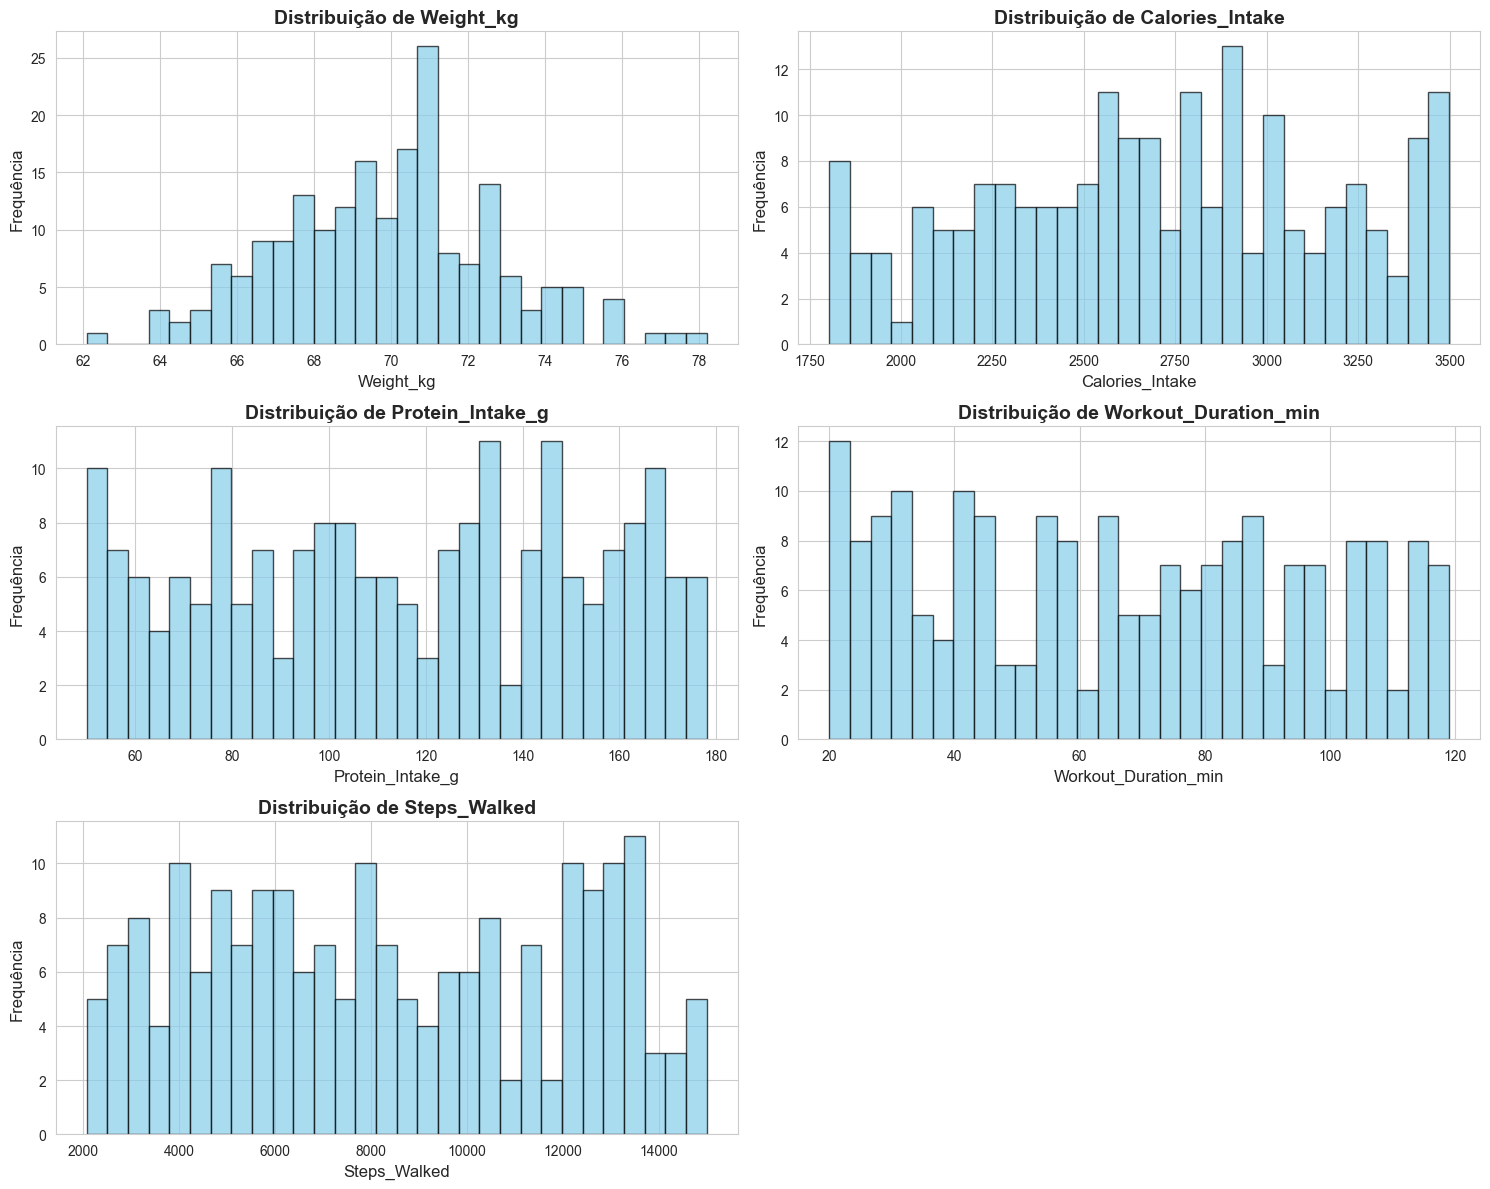

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 10) #tamanho da figura
numeric_cols = ['Weight_kg', 'Calories_Intake', 'Protein_Intake_g', 
                'Workout_Duration_min', 'Steps_Walked'] #features numericas para analise no grafico

fig, axes = plt.subplots(3, 2, figsize=(15, 12))# Criar subplots
axes = axes.ravel() #transforma o array do local do subplot em 1D para facilitar aanliase
#axes = [ax[0], ax[1], ax[2], ax[3], ax[4], ax[5]]

for idx, col in enumerate(numeric_cols): #para cada feature, o enumerate retorna doisvalores 
    #idx sendo o indice de cada elemento e col, o valor da coluna
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7) #para cada indice posta os valores em histograma
    #hist, faz plotar em modelo de histograma.
    axes[idx].set_title(f'Distribuição de {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Frequência', fontsize=12)

fig.delaxes(axes[5])#Remover o subplot extra

plt.tight_layout() #ajusta automaticamente o espaçamento entre os subplots
plt.show()

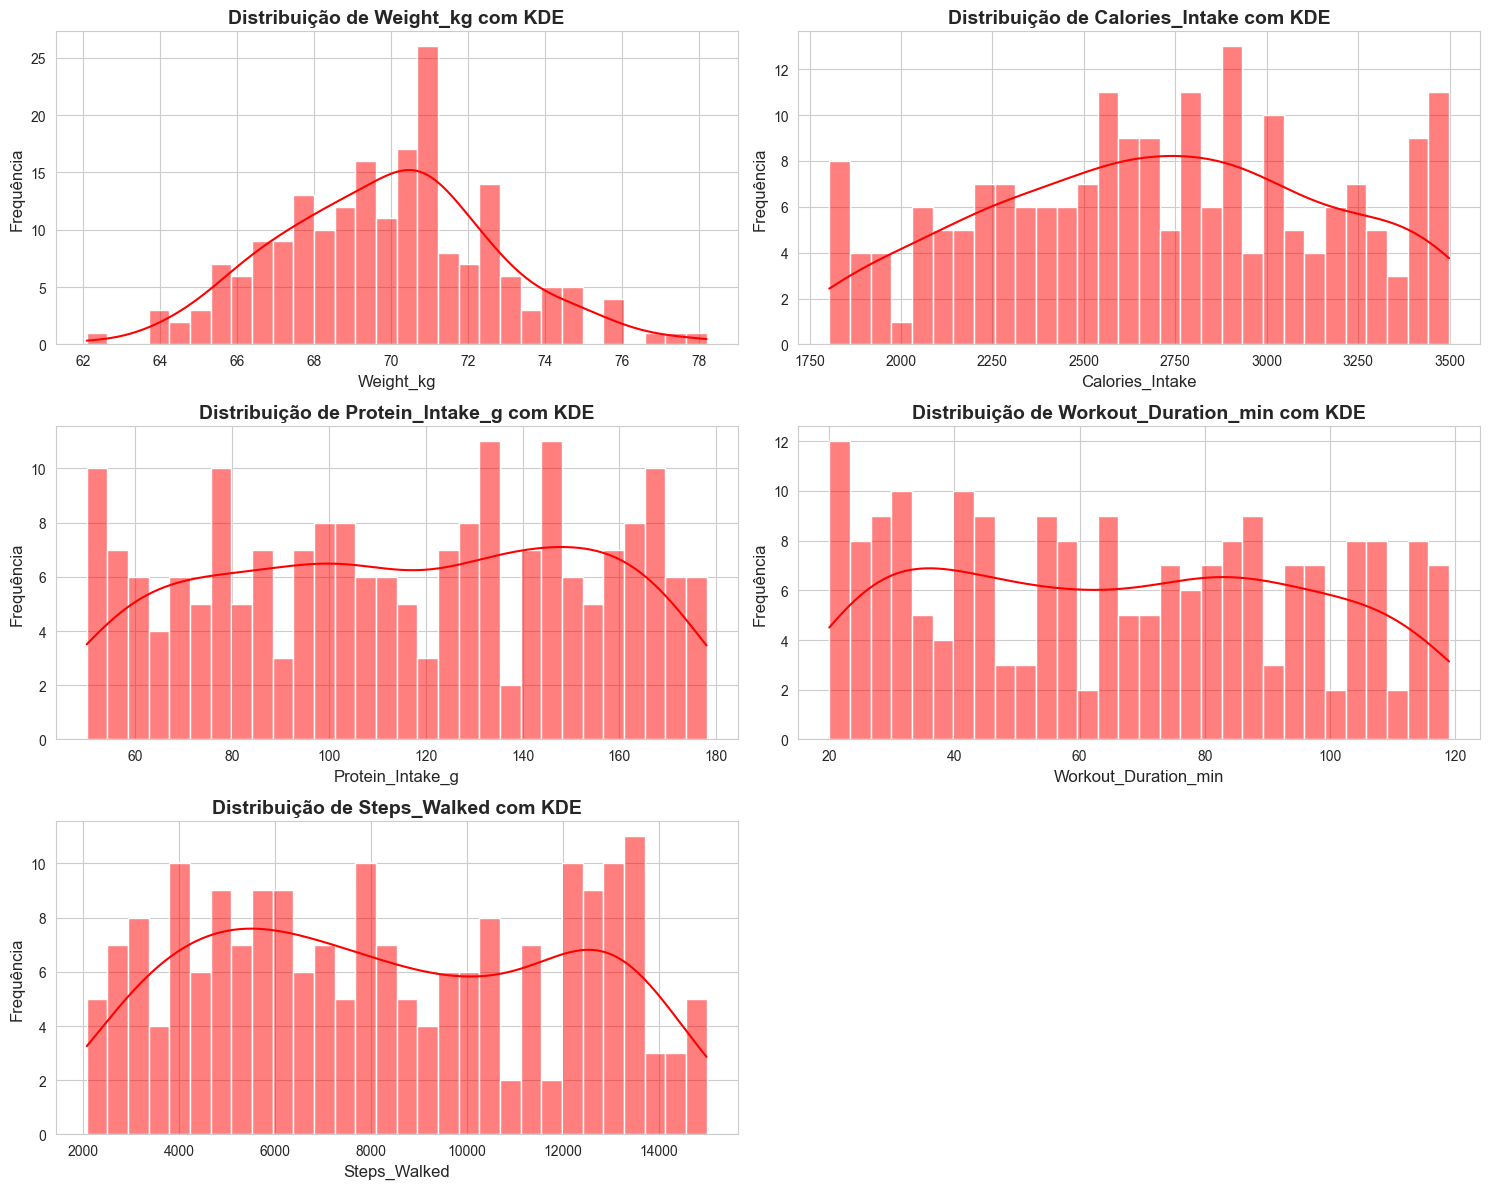

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, color='steelblue', ax=axes[idx])## Histogramas com densidade para verificar comportamento
    #suaviliza a distribuição de dados
    axes[idx].set_title(f'Distribuição de {col} com KDE', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Frequência', fontsize=12)
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

- Analisando os dados vemos que a distribuição  de peso é a que mais chega perto de uma distribuição normal. Vemos tambem que a distribuição de calorias lembra um normal tambem. Já as outras features mostram comportamentos longe de uma distribuição normal.

- A próxima análise deve ser a de boxplot para Identificar outliers (pontos fora das linhas)

![Texto alternativo](\images\Boxplot.png)

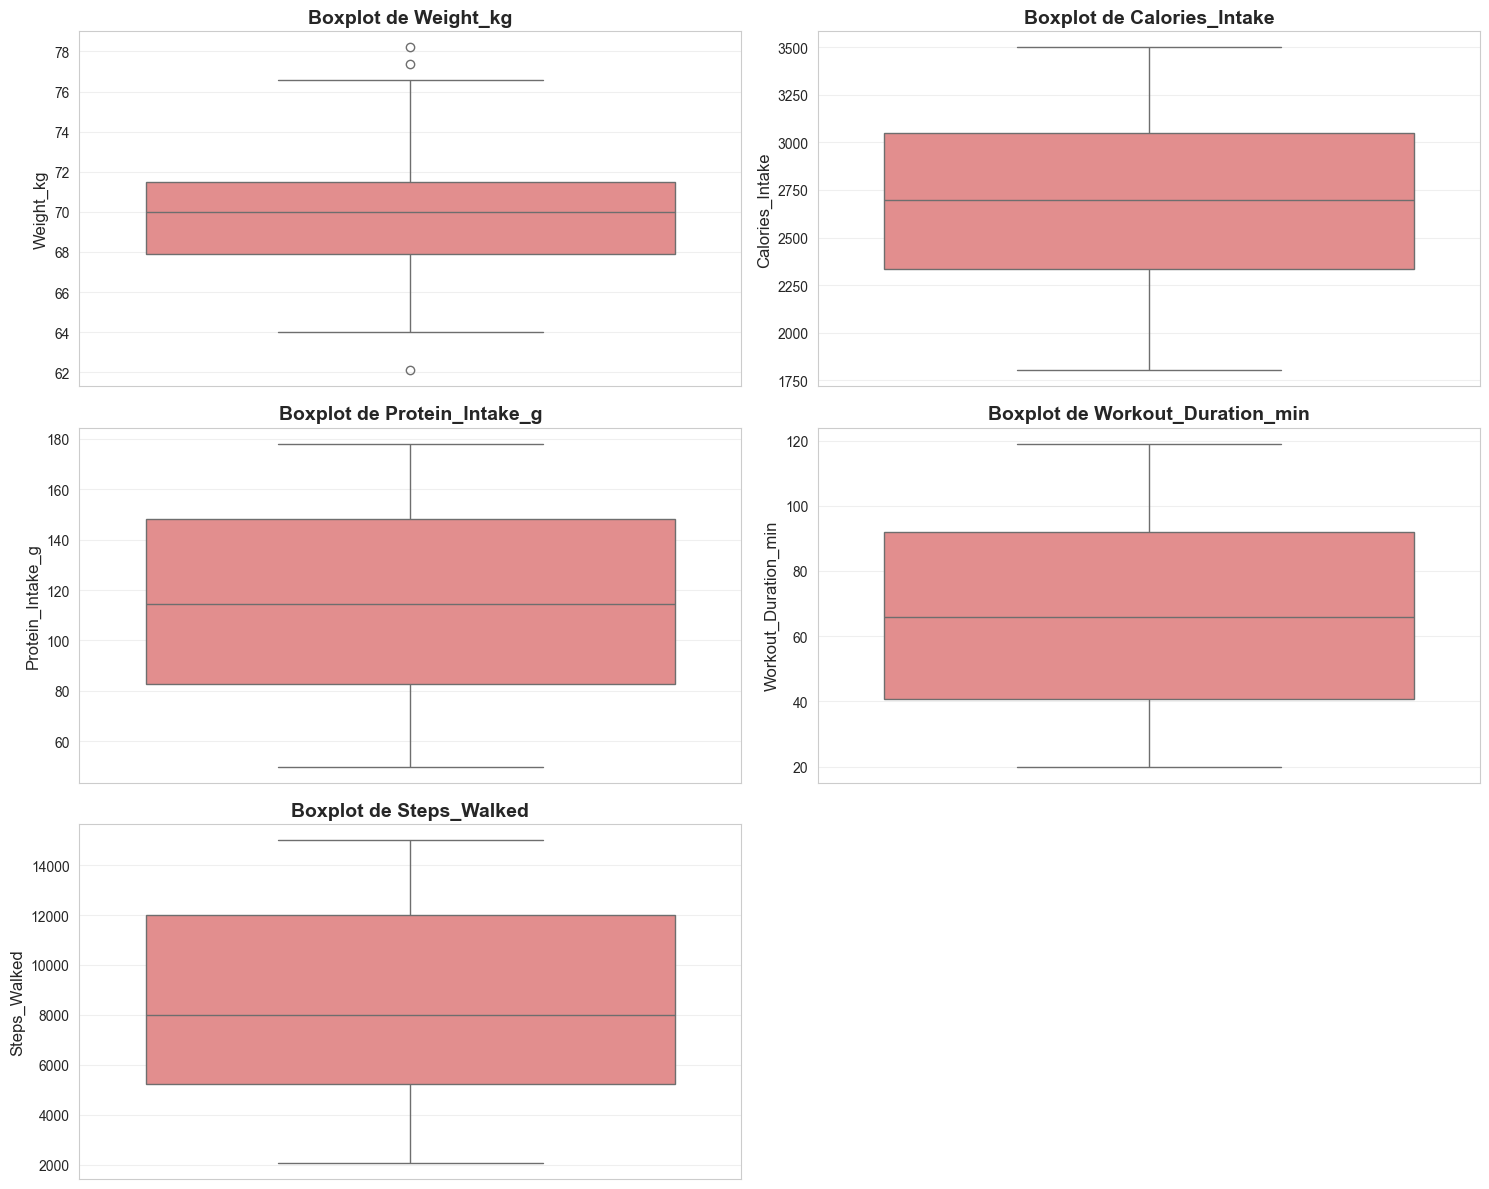

In [ ]:
#Boxplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], color='lightcoral', ax=axes[idx])
    #ao inves de usar hist usamos boxplot para plotar os graficos bloxpot e analsar comportamento
    axes[idx].set_title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=12)
    axes[idx].grid(axis='y', alpha=0.3)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

A feature Weight_kg apresentou MENOR variação relativa e possui outliers identificáveis. Já Steps_Walked e Calories_Intake apresentaram as MAIORES variações nos dados.

- Para uma analise mais completa para saber onde se concentra os dados, é necessário fazer a análise do violino que combina boxplot + KDE

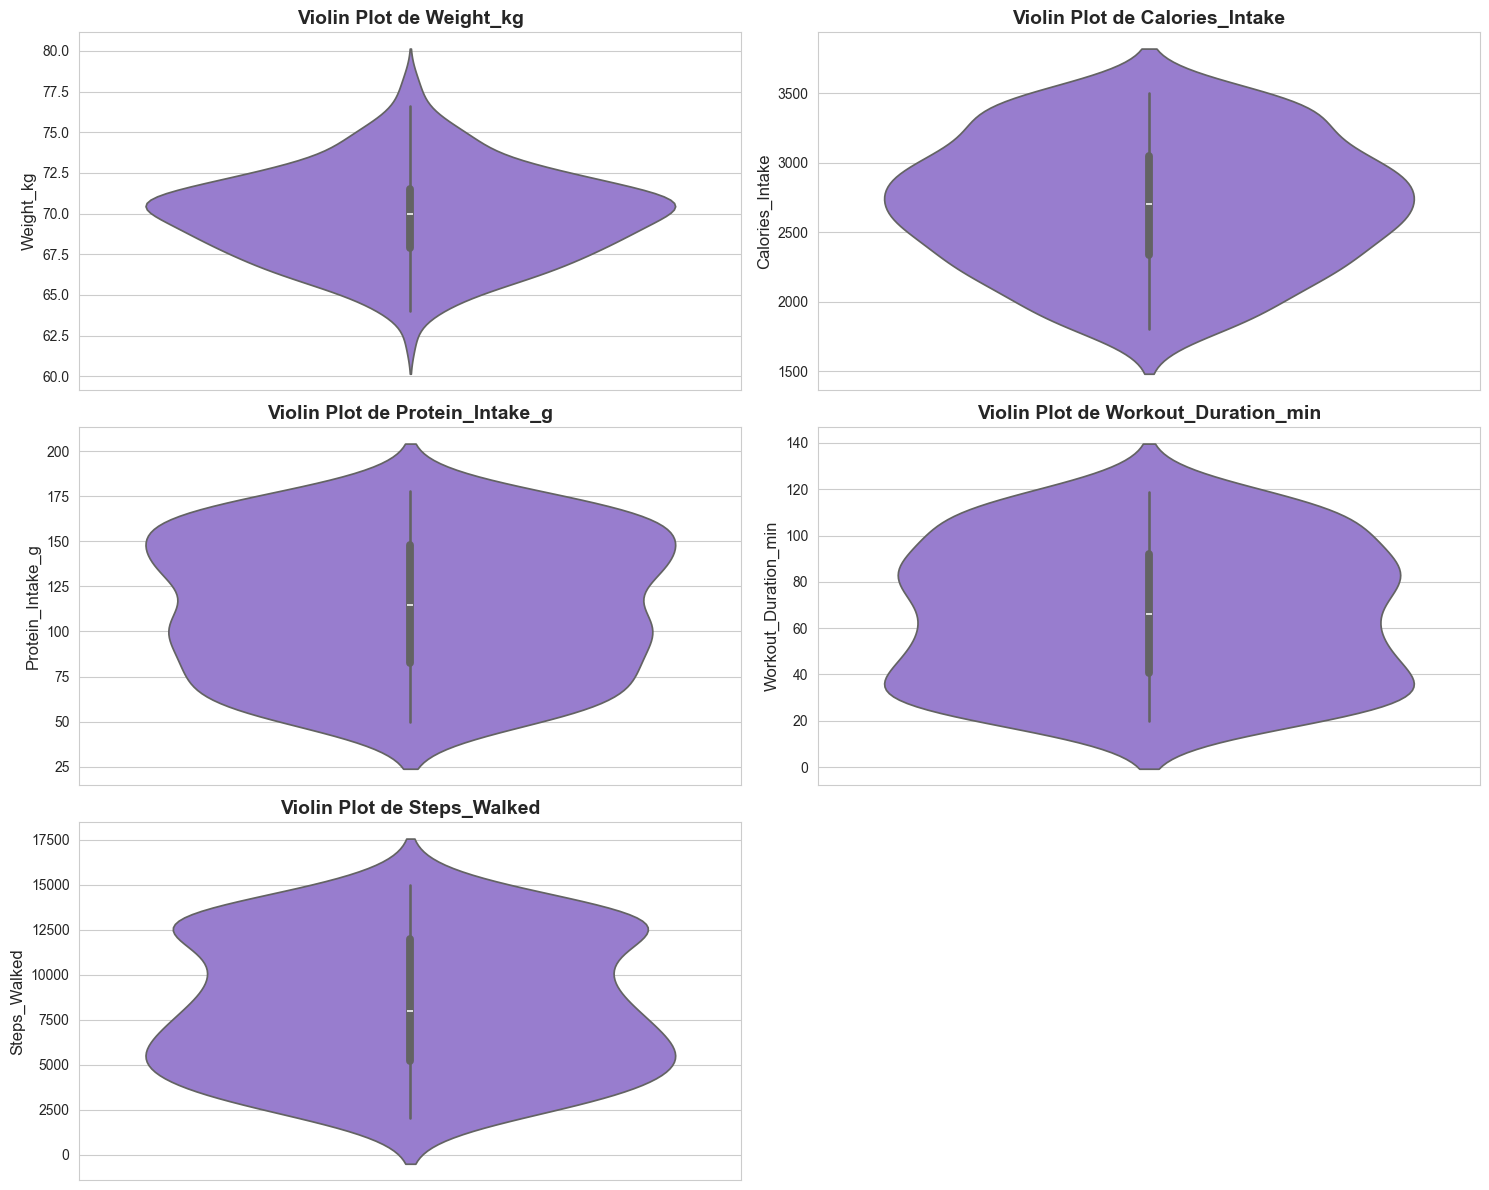

In [ ]:
# Violin plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.violinplot(y=df[col], color='mediumpurple', ax=axes[idx]) #plot grafico do violino para saber onde os dados se concentram.
    axes[idx].set_title(f'Violin Plot de {col}', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=12)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

- Weight_kg: Distribuição quase perfeitamente simétrica e unimodal centrada em ~70kg, confirmando normalidade. Concentração bem definida com pouca dispersão.

- Demais features: Protein_Intake, Workout_Duration e Steps_Walked mostram distribuições mais uniformes/achatadas sem picos bem definidos, enquanto Calories_Intake apresenta leve bimodalidade, confirmando a alta variabilidade observada nos boxplots.